In [1]:
import pandas as pd

df = pd.read_csv("data/hospital_data.csv")
df.head()
df.info()
df.describe()

C:\Users\anshu\AppData\Local\Temp\ipykernel_21172\765168827.py:3: DtypeWarning: Columns (10,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/hospital_data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101588 entries, 0 to 2101587
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

,Operating Certificate Number,Permanent Facility Id,Discharge Year,APR DRG Code,APR MDC Code,APR Severity of Illness Code
count,2.089497e+06,2.090946e+06,2101588.0,2.101588e+06,2.101588e+06,2.101588e+06
mean,4.990270e+06,1.033841e+03,2021.0,4.141057e+02,1.028546e+01,2.122646e+00
std,2.234939e+06,7.094093e+02,0.0,2.442334e+02,5.961765e+00,9.556966e-01
min,1.010000e+05,1.000000e+00,2021.0,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.951001e+06,5.280000e+02,2021.0,1.940000e+02,5.000000e+00,1.000000e+00
50%,5.902001e+06,1.045000e+03,2021.0,3.830000e+02,9.000000e+00,2.000000e+00
75%,7.002020e+06,1.453000e+03,2021.0,6.400000e+02,1.500000e+01,3.000000e+00
max,7.004010e+06,1.035500e+04,2021.0,9.560000e+02,2.500000e+01,4.000000e+00


In [33]:
# 1. Import other libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load dataset
df = pd.read_csv("data/hospital_data.csv", low_memory=False)

# 3. Quick overview
print(df.shape)
print(df.columns)
df.info()

# 4. Drop duplicate rows
df.drop_duplicates(inplace=True)

# 5. Clean 'Length of Stay'
df['Length_of_Stay'] = (
    df['Length of Stay']
    .astype(str)
    .str.extract(r'(\d+)')      # Extract only digits
    .astype(float)
)

# 6. Standardize 'Gender'
df['Gender'] = df['Gender'].astype(str).str.strip().str.upper()

# 7. Clean 'Birth Weight'
df['Birth Weight'] = pd.to_numeric(df['Birth Weight'], errors='coerce')

# 8. Clean 'Total Charges' and 'Total Costs'
df['Total Charges'] = df['Total Charges'].replace(r'[\$,]', '', regex=True)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

df['Total Costs'] = df['Total Costs'].replace(r'[\$,]', '', regex=True)
df['Total Costs'] = pd.to_numeric(df['Total Costs'], errors='coerce')

# 9. Drop rows with critical missing values
df.dropna(subset=['Length_of_Stay', 'Gender', 'Age Group'], inplace=True)

# 10. Standardize column names
df.columns = df.columns.str.replace(' ', '_')
df = df.loc[:, ~df.columns.duplicated()]  # Remove duplicate columns

# 11. Feature: High Severity flag
df['High_Severity'] = df['APR_Severity_of_Illness_Description'].apply(
    lambda x: 1 if str(x).lower() in ['major', 'extreme'] else 0
)

# 12. Feature: Primary Payment Type (fallback)
df['Primary_Payment'] = df['Payment_Typology_1'].fillna("Unknown")

# 13. Export cleaned version
df.to_csv("data/hospital_data_cleaned.csv", index=False)

print("✅ Cleaned data saved to 'data/hospital_data_cleaned.csv'")


(2101588, 33)
Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101588 entries, 0 to 2101587
Data columns (total 33 columns):
 #   Column                          

In [34]:
# Basic statistics
print(df.describe(include='all'))

# Null values per column
print(df.isnull().sum())

# Unique values in key columns
print(df['Age_Group'].value_counts())
print(df['Gender'].value_counts())
print(df['Primary_Payment'].value_counts())
print(df['High_Severity'].value_counts())


       Hospital_Service_Area Hospital_County  Operating_Certificate_Number  \
count                2083851         2083851                  2.082402e+06   
unique                     8              57                           NaN   
top            New York City       Manhattan                           NaN   
freq                  935902          364013                           NaN   
mean                     NaN             NaN                  4.994500e+06   
std                      NaN             NaN                  2.232363e+06   
min                      NaN             NaN                  1.010000e+05   
25%                      NaN             NaN                  2.951001e+06   
50%                      NaN             NaN                  5.902001e+06   
75%                      NaN             NaN                  7.002020e+06   
max                      NaN             NaN                  7.004010e+06   

        Permanent_Facility_Id         Facility_Name    Age_Grou

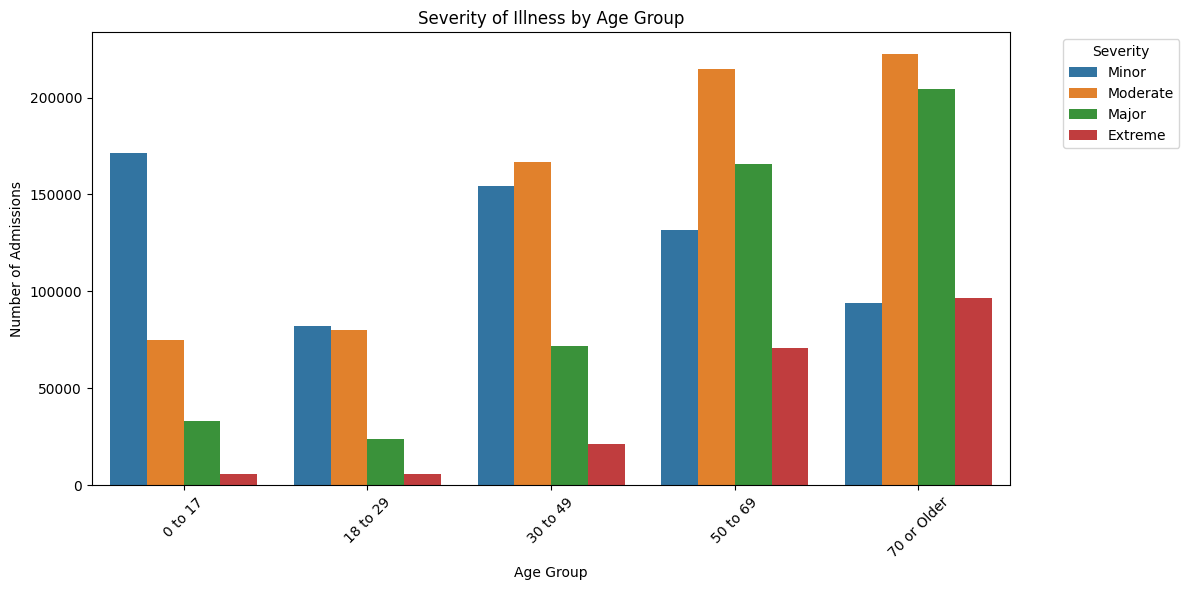

In [35]:
# Admissions by Age Group and Severity of Illness

plt.figure(figsize=(12, 6))

# Define the desired order for Age_Group and Severity
age_order = [
    '0 to 17', '18 to 29', '30 to 49', '50 to 69', '70 or Older'
]
severity_order = [
    'Minor', 'Moderate', 'Major', 'Extreme'
]

# Make sure Age_Group and APR_Severity_of_Illness_Description are categorical with the right order
df['Age_Group'] = pd.Categorical(df['Age_Group'], categories=age_order, ordered=True)
df['APR_Severity_of_Illness_Description'] = pd.Categorical(
    df['APR_Severity_of_Illness_Description'], categories=severity_order, ordered=True
)

sns.countplot(
    data=df,
    x='Age_Group',
    hue='APR_Severity_of_Illness_Description',
    order=age_order,
    hue_order=severity_order
)
plt.title("Severity of Illness by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Admissions")
plt.legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                                     DRG_Description   Count
0  NEONATE BIRTH WEIGHT > 2499 GRAMS, NORMAL NEWB...  168333
1                                   VAGINAL DELIVERY  123979
2             SEPTICEMIA AND DISSEMINATED INFECTIONS  121399
3     MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS   86719
4             CESAREAN SECTION WITHOUT STERILIZATION   60476
5                                      HEART FAILURE   56607
6                                      SCHIZOPHRENIA   30431
7                KIDNEY AND URINARY TRACT INFECTIONS   25497
8      CVA AND PRECEREBRAL OCCLUSION WITH INFARCTION   25283
9        CARDIAC ARRHYTHMIA AND CONDUCTION DISORDERS   24898


C:\Users\anshu\AppData\Local\Temp\ipykernel_11116\2591719498.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


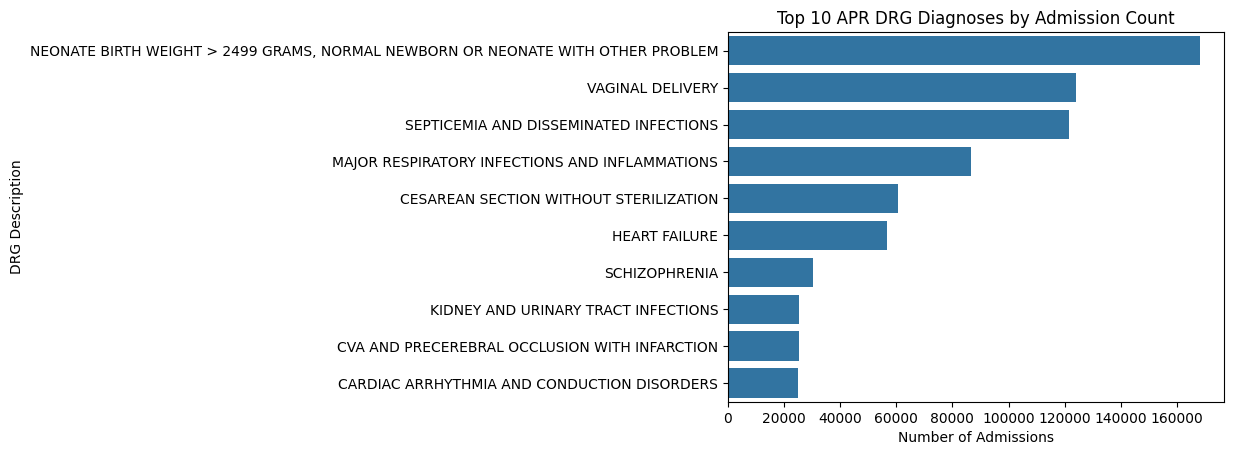

In [ ]:
# Selects the top 10 most frequent diagnoses by admission count.

top_drg = (
    df['APR_DRG_Description']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'DRG_Description', 'APR_DRG_Description': 'Count'})
)
# After reset_index(), the columns are usually ['APR_DRG_Description', 'count']
# So let's rename them properly:
top_drg.columns = ['DRG_Description', 'Count']

print(top_drg)
sns.barplot(data=top_drg, y='DRG_Description', x='Count')
plt.title("Top 10 APR DRG Diagnoses by Admission Count")
plt.xlabel("Number of Admissions")
plt.ylabel("DRG Description")
plt.tight_layout()
plt.show()

APR_Risk_of_Mortality  Minor  Moderate  Major  Extreme
Age_Group                                             
0 to 17                 89.2       7.6    2.5      0.7
18 to 29                81.9      10.8    5.0      2.3
30 to 49                69.8      15.5   10.1      4.6
50 to 69                38.8      25.4   23.9     11.8
70 or Older             22.3      29.4   31.6     16.7


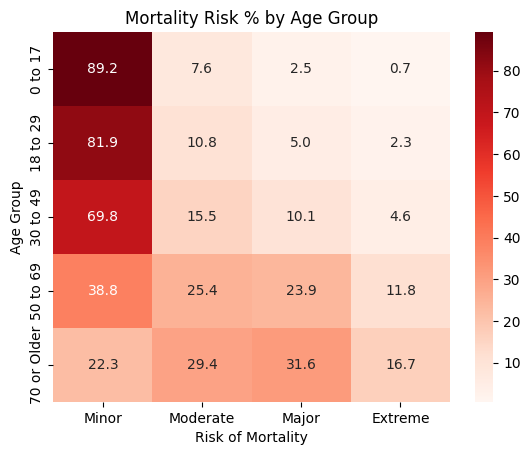

In [ ]:
# Mortality Risk by Age Group

# Define the desired order for Risk of Mortality
mortality_order = ['Minor', 'Moderate', 'Major', 'Extreme']
mort_by_age = pd.crosstab(df['Age_Group'], df['APR_Risk_of_Mortality'], normalize='index') * 100

# Reindex the columns to the desired order
mort_by_age = mort_by_age[mortality_order]

print(mort_by_age.round(1))

sns.heatmap(mort_by_age, annot=True, fmt=".1f", cmap="Reds")
plt.title("Mortality Risk % by Age Group")
plt.ylabel("Age Group")
plt.xlabel("Risk of Mortality")
plt.show()

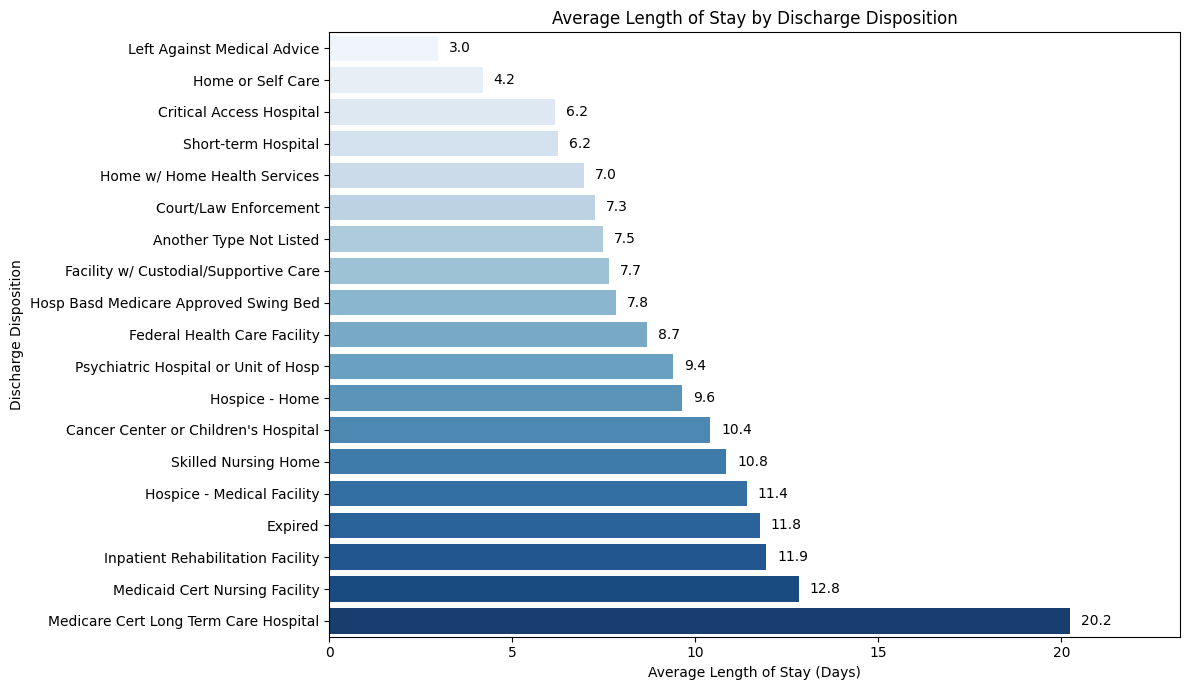

In [48]:
#  Average Length of Stay by Discharge Disposition

# Why it matters: Shows which discharge routes (home, skilled nursing facility, deceased) tie up beds longest, informing care coordination and post-acute planning.

# Average Length of Stay by Discharge Disposition (Horizontal Progress Bar with sharper shade)

import matplotlib.pyplot as plt
import seaborn as sns

# Work on a copy to avoid SettingWithCopyWarning
df_plot = df.copy()
df_plot['Length_of_Stay'] = pd.to_numeric(df_plot['Length_of_Stay'], errors='coerce')
df_plot = df_plot.dropna(subset=['Length_of_Stay'])

los_by_disp = (
    df_plot.groupby('Patient_Disposition')['Length_of_Stay']
      .mean()
      .sort_values(ascending=True)
      .reset_index()
      .rename(columns={'Length_of_Stay':'Avg_LOS'})
)

plt.figure(figsize=(12, 7))  # Wider figure for long bars

# Use hue to map color to Avg_LOS, legend=False to suppress extra legend
barplot = sns.barplot(
    data=los_by_disp,
    y='Patient_Disposition',
    x='Avg_LOS',
    hue='Avg_LOS',
    dodge=False,
    palette=sns.color_palette("Blues", n_colors=len(los_by_disp)),
    legend=False
)

# Add numbers to the end of each bar
for i, (value, label) in enumerate(zip(los_by_disp['Avg_LOS'], los_by_disp['Patient_Disposition'])):
    plt.text(value + 0.3, i, f"{value:.1f}", va='center')

plt.title("Average Length of Stay by Discharge Disposition")
plt.xlabel("Average Length of Stay (Days)")
plt.ylabel("Discharge Disposition")
plt.xlim(0, los_by_disp['Avg_LOS'].max() + 3)  # Add space for the largest value
plt.tight_layout()
plt.show()